## Classification with LDA, QDA and kNN

In this notebook we will look at implementing LDA, QDA and kNN models.

We start with trying these approaches on data concerning breast cancer tumors.  With that data, we are trying to 
determine if a cancer cell is (M)alignant or (B)enign.  Malignant tumors are cancerous; benign tumors are harmless.



In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Setting plot style
sns.set(style="whitegrid")

In [3]:
# read in the bcancer data
bcancer = pd.read_csv("https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/BreastCancer.csv", na_values=['NA'])
bcancer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diagnosis       569 non-null    object 
 1   Radius          569 non-null    float64
 2   Texture         569 non-null    float64
 3   Perimeter       569 non-null    float64
 4   Area            569 non-null    float64
 5   Smoothness      569 non-null    float64
 6   Compactness     569 non-null    float64
 7   Concavity       569 non-null    float64
 8   Concave Points  569 non-null    float64
 9   Symmetry        569 non-null    float64
dtypes: float64(9), object(1)
memory usage: 44.6+ KB



We are going to start with _Concavity_ and _Texture_ as predictors in our models.  We use two predictors/features primarily because we want to visualize the data which is harder to do once you get to more than two predictors.

In [4]:
X=bcancer[['Concavity','Texture']]
y=bcancer['Diagnosis']

Next we'll look at a scatterplot of these data.

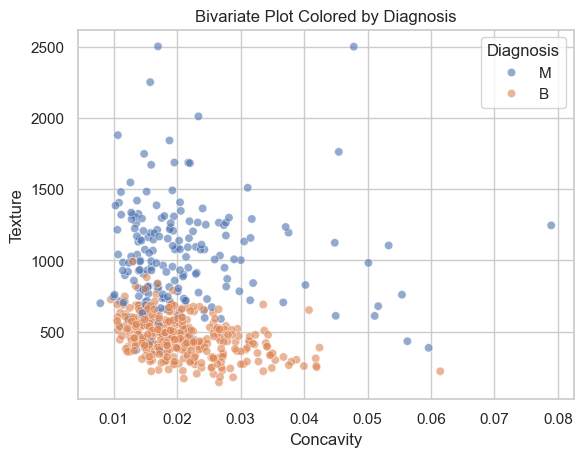

In [5]:
# note the alpha parameter here is for opacity or transparency
# lower values for alpha make the points more transparent
# so you can see the points behind a given point
sns.scatterplot(data=bcancer, x='Concavity', y='Texture', hue='Diagnosis',alpha=0.6)
# Set plot labels and title
plt.title('Bivariate Plot Colored by Diagnosis')
plt.xlabel('Concavity')
plt.ylabel('Texture')

# Show the plot
plt.show()

We are going to scale the predictors here in the next cell of code.  The reason that we do this is that 
the kNN methodology depends upon distances since we are getting _nearest_ neighbors.  However, if the
variables on are different scales, ie. have different variability, then the observations that are _nearest_
might be defined simply based upon the feature that has the largest variation.  

In [6]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### LDA
We will start with LDA.  

Recall that, strictly speaking, the conditions for LDA are not met since we don't have
Normality, nor do we have similar variances/covariances in both values for _Diagnosis_.
Note that in practice what this means is that LDA will be less than optimal if the data
don't meet our conditions.  That said, sometimes LDA works pretty well so we'll try it.

In [7]:

# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model to the training data
lda.fit(X_scaled, y)

# Now that we have transformed the data, let's use LDA to make predictions on the test data

y_pred = lda.predict(X_scaled)
print(y_pred)

['M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B

Note that some of the measures for classification prefer values that are numeric in outcomes rather than categorical as we have here, so we'll have a second set of values for y and predicted y.

In [8]:

y_pred2= (y_pred == "M").astype(int)
y2=(y=="M").astype(int)

In [9]:
# define the specificity 
def specificity_score(y_true, y_pred):
    """
    Calculate specificity.

    Args:
        y_true (list or numpy.ndarray): True labels.
        y_pred (list or numpy.ndarray): Predicted labels.

    Returns:
        float: Specificity score.
    """
    true_negatives = sum((y_true == 0) & (y_pred == 0))
    false_positives = sum((y_true == 0) & (y_pred == 1))
    
    if (true_negatives + false_positives) == 0:
      return 0.0
    
    specificity = true_negatives / (true_negatives + false_positives)
    return specificity

Next step is to evaluate the performance of our metrics.  These are below.




In [10]:
# Obtain and print classification performance for LDA
cm = confusion_matrix(y, y_pred)
print(cm)

accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y2, y_pred2)
print(f"Precision: {precision:.4f}")

recall = recall_score(y2, y_pred2)
print(f"Recall: {recall:.4f}")

specificity = specificity_score(y2, y_pred2)
print(f"specificity: {recall:.4f}")

f1 = f1_score(y2, y_pred2)
print(f"f1: {f1:.4f}")


[[351   6]
 [ 76 136]]
Accuracy: 0.8559
Precision: 0.9577
Recall: 0.6415
specificity: 0.6415
f1: 0.7684


From this output we can see that (76+6) = 82 of the tumors were not predicted accurately but we still got an overall accuracy of $0.8559$.  _Precision_ was good but _recall_ was not.


#### F1 score
Above we used a new metric for assessing our classification performance, f1.

[<https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall>]
The F1 score is the harmonic mean (a kind of average) of precision and recall.

Mathematically, it is given by:
$$  \text{F1}=2*\frac{\text{precision * recall}}{\text{precision + recall}} = \frac{2\text{TP}}{2\text{TP + FP + FN}}  $$

This metric balances the importance of precision and recall, and is preferable to accuracy for class-imbalanced datasets. When precision and recall both have perfect scores of 1.0, F1 will also have a perfect score of 1.0. More broadly, when precision and recall are close in value, F1 will be close to their value. When precision and recall are far apart, F1 will be similar to whichever metric is worse.

### QDA

Next we will look at quadratic discriminant analysis (QDA).  While QDA still uses a Normal distribution/density
calculation for the decision rule, it is more robust and more flexible than LDA.  

In [11]:

# Initialize the LDA model
qda = QuadraticDiscriminantAnalysis()

# Fit the model to the training data
qda.fit(X, y)

# Now that we have transformed the data, let's use LDA to make predictions on the test data

y_pred = qda.predict(X)
print(y_pred)

['M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'B'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B

In [12]:
# get predicted values for QDA
y_pred2= (y_pred == "M").astype(int)
y2=(y=="M").astype(int)

In [13]:
# obtain and print classification performance for QDA
cm = confusion_matrix(y, y_pred)
print(cm)

accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y2, y_pred2)
print(f"Precision: {precision:.4f}")

recall = recall_score(y2, y_pred2)
print(f"Recall: {recall:.4f}")

specificity = specificity_score(y2, y_pred2)
print(f"specificity: {recall:.4f}")

f1 = f1_score(y2, y_pred2)
print(f"f1: {f1:.4f}")

[[347  10]
 [ 58 154]]
Accuracy: 0.8805
Precision: 0.9390
Recall: 0.7264
specificity: 0.7264
f1: 0.8191


So from the confusion matrix we can see that now 68 = 58+10 of the tumors were non correctly predicted.

### kNN
The next methodology that we'll consider is _k_ Nearest Neighbors (kNN).  The idea behind kNN is to take
the observations that are closest to each point and have those points vote for what should be the predicted value
of that observation.  Generally, odd numbers of _k_ are chosen so there are no ties.  



In [14]:
# initiate and fit the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=3)

In [15]:
# get the predicted values
knn_preds_3 = knn.predict(X_scaled)


In [16]:
# making predicted values for kNN with k=3
y_pred2= (knn_preds_3 == "M").astype(int)
y_pred=knn_preds_3

In [17]:
#Performance for kNN with k=3
cm = confusion_matrix(y, y_pred)
print(cm)

accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y2, y_pred2)
print(f"Precision: {precision:.4f}")

recall = recall_score(y2, y_pred2)
print(f"Recall: {recall:.4f}")

specificity = specificity_score(y2, y_pred2)
print(f"specificity: {recall:.4f}")

f1 = f1_score(y2, y_pred2)
print(f"f1: {f1:.4f}")

[[336  21]
 [ 27 185]]
Accuracy: 0.9156
Precision: 0.8981
Recall: 0.8726
specificity: 0.8726
f1: 0.8852


With 48 observations here that are predicted inaccurately, this model is better than either LDA or QDA.  

One choice that has to be made when using kNN is the choice of how many observations will be included as 'neighbors' that are 'nearest'.  So let's try another value for _k_ , say, _k_=7.  

In [18]:
knn7 = KNeighborsClassifier(n_neighbors=7)
knn7.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=7)

In [19]:
knn_preds_7 = knn7.predict(X_scaled)

In [20]:
# making predicted values for kNN with k=7
y_pred2= (knn_preds_7 == "M").astype(int)
y_pred=knn_preds_7

In [21]:
#Performance for kNN with k=7
cm = confusion_matrix(y, y_pred)
print(cm)

accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y2, y_pred2)
print(f"Precision: {precision:.4f}")

recall = recall_score(y2, y_pred2)
print(f"Recall: {recall:.4f}")

specificity = specificity_score(y2, y_pred2)
print(f"specificity: {recall:.4f}")

f1 = f1_score(y2, y_pred2)
print(f"f1: {f1:.4f}")

[[343  14]
 [ 45 167]]
Accuracy: 0.8963
Precision: 0.9227
Recall: 0.7877
specificity: 0.7877
f1: 0.8499


In [22]:
knn25 = KNeighborsClassifier(n_neighbors=25)
knn25.fit(X_scaled, y)
knn_preds_25 = knn25.predict(X_scaled)

In [23]:
# making predicted values for kNN with k=25
y_pred2= (knn_preds_25 == "M").astype(int)
y_pred=knn_preds_25

In [24]:
#Performance for kNN with k=25
cm = confusion_matrix(y, y_pred)
print(cm)

accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y2, y_pred2)
print(f"Precision: {precision:.4f}")

recall = recall_score(y2, y_pred2)
print(f"Recall: {recall:.4f}")

f1 = f1_score(y2, y_pred2)
print(f"f1: {f1:.4f}")

[[346  11]
 [ 61 151]]
Accuracy: 0.8735
Precision: 0.9321
Recall: 0.7123
f1: 0.8075


### Tasks

1. Write a loop to compare the accuracy of kNN when k=3,5,7,...,19, store the accuracies that you get and plot the resulting accuracies.  Determine which value for _k_ give the best prediction.

2. Add radius and texture as features to the _X_ matrix.  Compare LDA, QDA and kNN with these features added.  Was adding these features useful?

3. What visualizations that we used in DTSC 2302 might be useful for determining if a predictor is useful?


In [25]:
k_values=[3,5,7,9,11,13,15,19]
accuracy_k = []
# loop through taking a sample and calculating a mean from the sample n_reps times
for i in k_values:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_scaled, y)
  knn_preds = knn.predict(X_scaled)
  accuracy_k.append(accuracy_score(y, knn_preds))

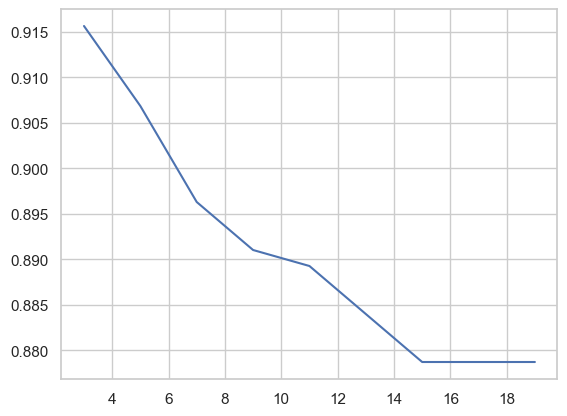

In [26]:
plt.plot(k_values,accuracy_k)
plt.show()

In [27]:
X=bcancer[['Concavity','Texture','Radius','Area']]
y=bcancer['Diagnosis']
X_scaled = scaler.fit_transform(X)

In [28]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_scaled, y)
y_pred = lda.predict(X_scaled)

cm = confusion_matrix(y, y_pred)
print(cm)

accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y2, y_pred2)
print(f"Precision: {precision:.4f}")

recall = recall_score(y2, y_pred2)
print(f"Recall: {recall:.4f}")

f1 = f1_score(y2, y_pred2)
print(f"f1: {f1:.4f}")

[[342  15]
 [ 42 170]]
Accuracy: 0.8998
Precision: 0.9321
Recall: 0.7123
f1: 0.8075


In [29]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_scaled, y)
y_pred = qda.predict(X_scaled)
y_pred2= (y_pred == "M").astype(int)

cm = confusion_matrix(y, y_pred)
print(cm)

accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y2, y_pred2)
print(f"Precision: {precision:.4f}")

recall = recall_score(y2, y_pred2)
print(f"Recall: {recall:.4f}")

f1 = f1_score(y2, y_pred2)
print(f"f1: {f1:.4f}")

[[344  13]
 [ 47 165]]
Accuracy: 0.8946
Precision: 0.9270
Recall: 0.7783
f1: 0.8462


In [30]:
knn25 = KNeighborsClassifier(n_neighbors=5)
knn25.fit(X_scaled, y)
y_pred = knn25.predict(X_scaled)
y_pred2= (y_pred == "M").astype(int)


cm = confusion_matrix(y, y_pred)
print(cm)

accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y2, y_pred2)
print(f"Precision: {precision:.4f}")

recall = recall_score(y2, y_pred2)
print(f"Recall: {recall:.4f}")

f1 = f1_score(y2, y_pred2)
print(f"f1: {f1:.4f}")

[[341  16]
 [ 29 183]]
Accuracy: 0.9209
Precision: 0.9196
Recall: 0.8632
f1: 0.8905


<Axes: xlabel='Diagnosis', ylabel='Compactness'>

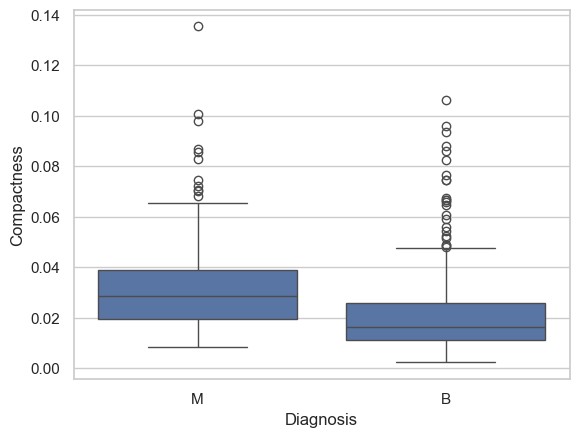

In [31]:
sns.boxplot(x="Diagnosis", y="Compactness",data=bcancer)



<Axes: xlabel='Diagnosis', ylabel='Area'>

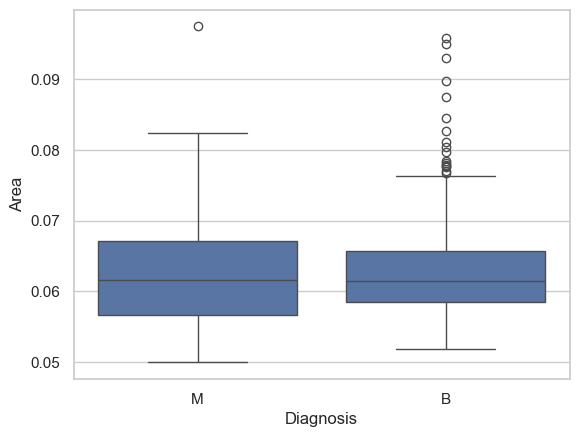

In [32]:
sns.boxplot(x="Diagnosis", y= "Area",data=bcancer)

<Axes: xlabel='Diagnosis', ylabel='Smoothness'>

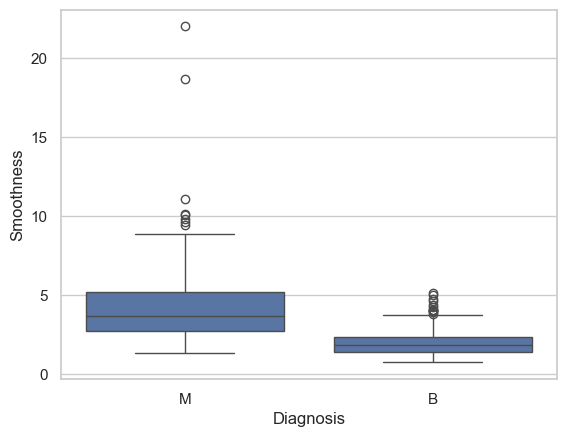

In [33]:
sns.boxplot(x="Diagnosis", y= "Smoothness",data=bcancer)

## Classification with more than two classes

In the next section we are going to look at classification with more than two classes.  We'll start with the _iris_ data.

And we'll add some cross validation.

Additionally, when we are dealing with multi-class, more than 2 classes, classification we usually focus on the accuracy of the model and less on the other metrics.

Also note that logistic regression cannot be used for multi-class classification though there is an extension called multinomial logistic regression that is specifically for prediction of multiple categories.



In [34]:
# Importing necessary libraries
# need to add 'load_iris'
from sklearn.datasets import load_iris



In [35]:
# Loading the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

We will split the data here with 30% of the data going into the test set (*test_size=0.3*).  

In [36]:

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=250325)

In [37]:
# Standardizing the data for better performance of kNN (kNN is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# Defining and training the classifiers

# note that LDA and QDA inherently scale their features/predictors
# so technically we could use lda.fit(X_train,y_train) and get the same results here
# but for consistencly we'll still with 

## 1. Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)

## 2. Quadratic Discriminant Analysis (QDA)
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_scaled, y_train)

## 3. k-Nearest Neighbors (kNN)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=3)

In [39]:
# Making predictions with each classifier
lda_preds = lda.predict(X_test_scaled)
qda_preds = qda.predict(X_test_scaled)
knn_preds = knn3.predict(X_test_scaled)

In [40]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Performance of {model.__class__.__name__}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(cm)
    


In [41]:
# get the evaluation method for the 
evaluate_model(lda, X_test_scaled, y_test)
print("")
evaluate_model(qda,X_test_scaled,y_test)
print("")
evaluate_model(knn3,X_test_scaled,y_test)


Performance of LinearDiscriminantAnalysis:
Accuracy: 0.9556
Confusion Matrix:
[[12  0  0]
 [ 0 16  2]
 [ 0  0 15]]

Performance of QuadraticDiscriminantAnalysis:
Accuracy: 0.9556
Confusion Matrix:
[[12  0  0]
 [ 0 16  2]
 [ 0  0 15]]

Performance of KNeighborsClassifier:
Accuracy: 0.8889
Confusion Matrix:
[[12  0  0]
 [ 0 15  3]
 [ 0  2 13]]


So the out of sample accuracy of the models is the same for this particular choice of the test set. 

In [42]:
# Visualizing confusion matrices for each classifier
# Here's another function for plotting the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

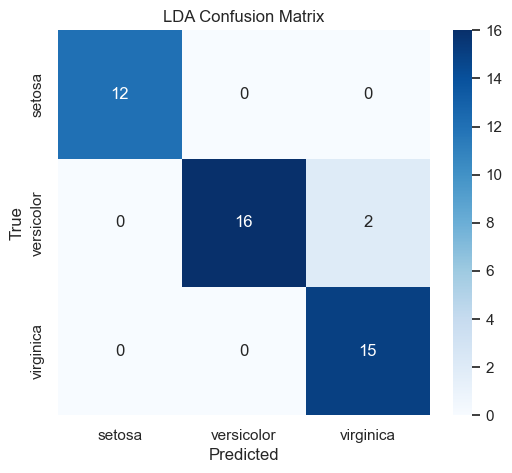

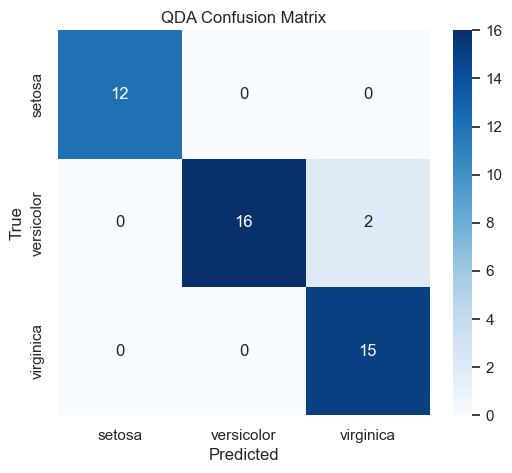

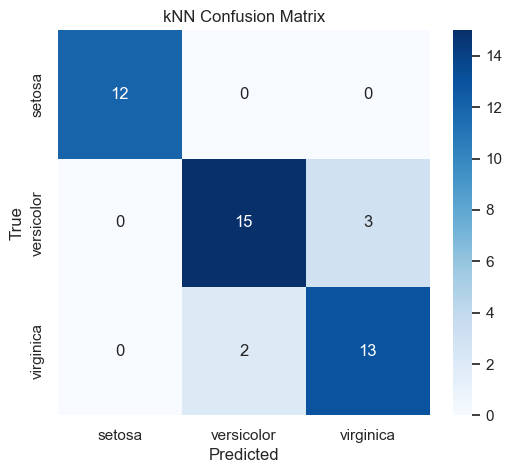

In [43]:
# Plotting confusion matrices
plot_confusion_matrix(y_test, lda_preds, 'LDA Confusion Matrix')
plot_confusion_matrix(y_test, qda_preds, 'QDA Confusion Matrix')
plot_confusion_matrix(y_test, knn_preds, 'kNN Confusion Matrix')

### Tasks

4. For the above data, change the _k_ in the kNN from 3 to 9.  How does the performance change?

5. What if we changed the test and train set, should we expect the same results?  Change the 'random_state' to a different value and rerun these analyses.  Do you get the same results?  

6. Open the Penguins dataset, we now want to predict Penguin species using body mass, flipper length and bill length.  Run an analysis like we did above for the _iris data_ on the penguin data.  Evaluate the 

7. Continuing with the Penguins dataset, using the predictors from the previous task compare the out-of-sample performance of different values for _k_ in the kNN approach with these data.





Task 4

In [44]:
knn9 = KNeighborsClassifier(n_neighbors=9)
knn9.fit(X_train_scaled, y_train)
evaluate_model(knn9,X_test_scaled,y_test)

Performance of KNeighborsClassifier:
Accuracy: 0.8889
Confusion Matrix:
[[12  0  0]
 [ 0 15  3]
 [ 0  2 13]]


Task 5

In [45]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Standardizing the data for better performance of kNN (kNN is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Task 6

In [46]:
penguins = pd.read_csv("https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/penguins.csv", na_values=['NA'])
# remove rows with missing data
penguins.dropna(inplace=True)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [47]:
X=penguins[['body_mass_g', 'flipper_length_mm', 'bill_length_mm']]
y=penguins['species']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=250326)

# Standardizing the data for better performance of kNN (kNN is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

feature_names = ['body_mass_g', 'flipper_length_mm', 'bill_length_mm']
target_names = ['Adelie', 'Gentoo', 'Chinstrap']

In [48]:

## 1. Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)

## 2. Quadratic Discriminant Analysis (QDA)
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_scaled, y_train)

## 3. k-Nearest Neighbors (kNN)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_scaled, y_train)

# Making predictions with each classifier
lda_preds = lda.predict(X_test_scaled)
qda_preds = qda.predict(X_test_scaled)
knn_preds = knn3.predict(X_test_scaled)

In [49]:
# get the evaluation method for the 
evaluate_model(lda, X_test_scaled, y_test)
print("")
evaluate_model(qda,X_test_scaled,y_test)
print("")
evaluate_model(knn3,X_test_scaled,y_test)

Performance of LinearDiscriminantAnalysis:
Accuracy: 0.9800
Confusion Matrix:
[[43  1  0]
 [ 1 21  0]
 [ 0  0 34]]

Performance of QuadraticDiscriminantAnalysis:
Accuracy: 0.9600
Confusion Matrix:
[[41  2  1]
 [ 0 21  1]
 [ 0  0 34]]

Performance of KNeighborsClassifier:
Accuracy: 0.9800
Confusion Matrix:
[[43  1  0]
 [ 0 21  1]
 [ 0  0 34]]


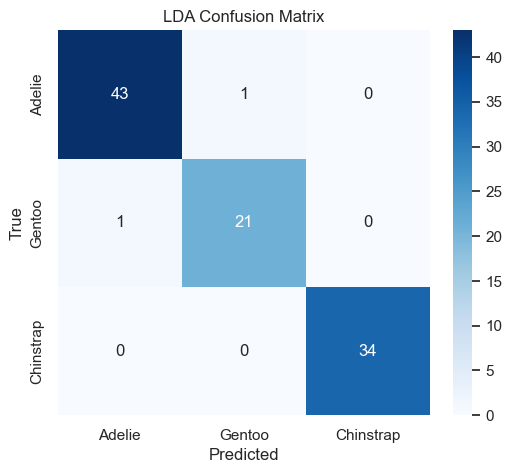

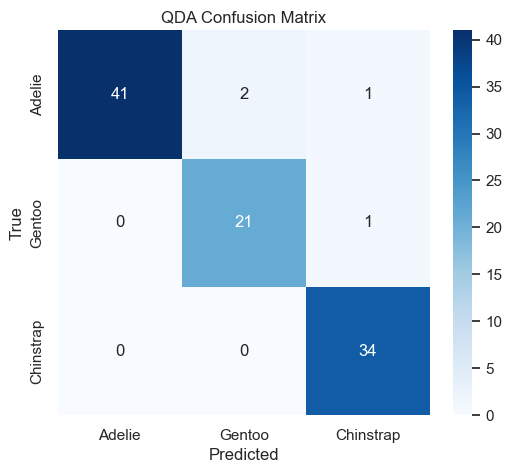

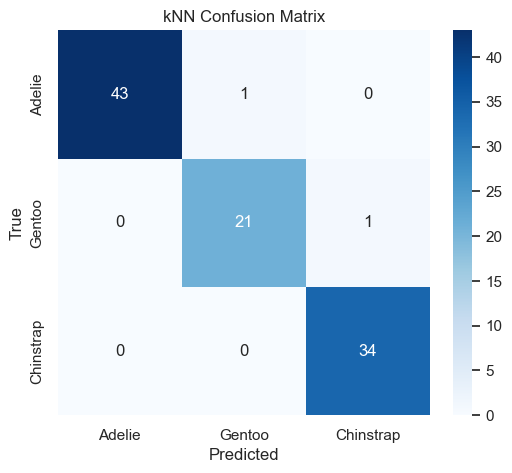

In [50]:
# Plotting confusion matrices
plot_confusion_matrix(y_test, lda_preds, 'LDA Confusion Matrix')
plot_confusion_matrix(y_test, qda_preds, 'QDA Confusion Matrix')
plot_confusion_matrix(y_test, knn_preds, 'kNN Confusion Matrix')

Task 7

In [51]:
k_values=[3,5,7,9,11,13,15,19, 21, 23, 25]
accuracy_k = []
# loop through taking a sample and calculating a mean from the sample n_reps times
for i in k_values:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_scaled, y_train)
  knn_preds = knn.predict(X_test_scaled)
  accuracy_k.append(accuracy_score(y_test, knn_preds))

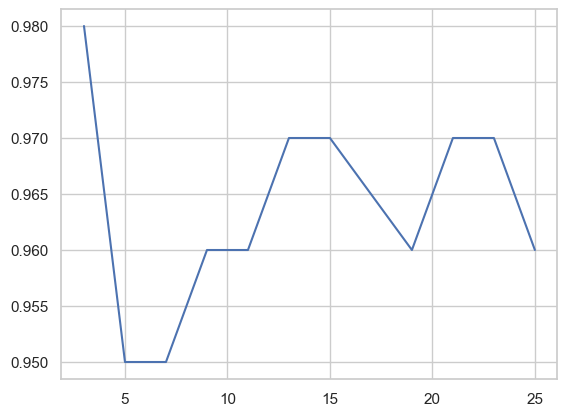

In [52]:
plt.plot(k_values,accuracy_k)
plt.show()